In [6]:
import pandas as pd

In [8]:
# Load the uploaded Titanic datasets
gender_submission_path = 'C:/Users/shiva/Downloads/gender_submission.csv'
test_data_path = 'C:/Users/shiva/Downloads/test.csv'
train_data_path = 'C:/Users/shiva/Downloads/train.csv'

gender_submission_df = pd.read_csv(gender_submission_path)
test_df = pd.read_csv(test_data_path)
train_df = pd.read_csv(train_data_path)

# Display the first few rows of each dataset to inspect their structure and contents
gender_submission_df.head(), test_df.head(), train_df.head()

(   PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1,
    PassengerId  Pclass                                          Name     Sex  \
 0          892       3                              Kelly, Mr. James    male   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
 2          894       2                     Myles, Mr. Thomas Francis    male   
 3          895       3                              Wirz, Mr. Albert    male   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
 
     Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
 0  34.5      0      0   330911   7.8292   NaN        Q  
 1  47.0      1      0   363272   7.0000   NaN        S  
 2  62.0      0      0   240276   9.6875   NaN        Q  
 3  27.0      0      0   315154   8.6625   NaN        S  
 4  22.0      1      1  3101298  12.2875   NaN        S  ,
    Pa

In [12]:
# Check for missing values
missing_values = gender_submission_df.isnull().sum()
missing_values


PassengerId    0
Survived       0
dtype: int64

In [13]:
missing_values = test_df.isnull().sum()
missing_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
missing_values = train_df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
# Handle missing values
# For simplicity, let's fill missing values in 'Age' with the median and drop rows with missing 'Embarked' and 'Cabin'

# Fill missing 'Age' values with the median age
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
# Drop the 'Cabin' column since it has too many missing values
test_df.drop(columns=['Cabin'], inplace=True)


In [18]:
# Handle missing values
# For simplicity, let's fill missing values in 'Age' with the median and drop rows with missing 'Embarked' and 'Cabin'

# Fill missing 'Age' values with the median age
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Drop rows with missing 'Embarked' values
train_df.dropna(subset=['Embarked'], inplace=True)

# Drop the 'Cabin' column since it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)


In [19]:
# Convert 'Sex' and 'Embarked' columns to numerical values
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)


In [20]:
# Convert 'Sex' and 'Embarked' columns to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)


In [21]:
# Display summary statistics
test_df.describe()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,29.599282,0.447368,0.392344,35.627188,0.110048,0.645933
std,120.810458,0.841838,0.481622,12.703770,0.896760,0.981429,55.907576,0.313324,0.478803
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,0.000000,1.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000


In [22]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.315152,0.524184,0.382452,32.096681,0.086614,0.724409
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [23]:
gender_submission_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [24]:
# Calculate the correlation matrix
correlation_matrix = test_df.corr()

# Display the correlation matrix
correlation_matrix


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.026751,-0.023245,-0.031447,0.003818,0.043080,0.008211,-0.035731,0.048008
Pclass,-0.026751,1.000000,-0.108615,-0.467853,0.001087,0.018721,-0.577147,0.252608,0.120783
Sex,-0.023245,-0.108615,1.000000,0.008035,0.099943,0.159120,0.191514,0.115574,-0.105883
Age,-0.031447,-0.467853,0.008035,1.000000,-0.071197,-0.043731,0.347105,-0.041310,-0.118594
SibSp,0.003818,0.001087,0.099943,-0.071197,1.000000,0.306895,0.171539,-0.098824,0.079367
Parch,0.043080,0.018721,0.159120,-0.043731,0.306895,1.000000,0.230046,-0.132948,0.092201
Fare,0.008211,-0.577147,0.191514,0.347105,0.171539,0.230046,1.000000,-0.155562,-0.178582
Embarked_Q,-0.035731,0.252608,0.115574,-0.041310,-0.098824,-0.132948,-0.155562,1.000000,-0.474962
Embarked_S,0.048008,0.120783,-0.105883,-0.118594,0.079367,0.092201,-0.178582,-0.474962,1.000000


In [25]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Display the correlation matrix
correlation_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,-0.043136,0.031319,-0.057686,-0.001657,0.012703,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,0.541585,-0.069822,-0.034040,0.083151,0.255290,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.127741,-0.336512,0.081656,0.016824,-0.548193,0.220558,0.076466
Sex,-0.043136,0.541585,-0.127741,1.000000,-0.086506,0.116348,0.247508,0.179958,0.075217,-0.121405
Age,0.031319,-0.069822,-0.336512,-0.086506,1.000000,-0.232543,-0.171485,0.093707,-0.030436,-0.008964
SibSp,-0.057686,-0.034040,0.081656,0.116348,-0.232543,1.000000,0.414542,0.160887,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,0.247508,-0.171485,0.414542,1.000000,0.217532,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.179958,0.093707,0.160887,0.217532,1.000000,-0.116684,-0.163758
Embarked_Q,-0.033694,0.004536,0.220558,0.075217,-0.030436,-0.026692,-0.081585,-0.116684,1.000000,-0.499261
Embarked_S,0.022269,-0.151777,0.076466,-0.121405,-0.008964,0.069438,0.061512,-0.163758,-0.499261,1.000000


In [26]:
# Calculate the correlation matrix
correlation_matrix = gender_submission_df.corr()

# Display the correlation matrix
correlation_matrix

,PassengerId,Survived
PassengerId,1.000000,-0.023245
Survived,-0.023245,1.000000


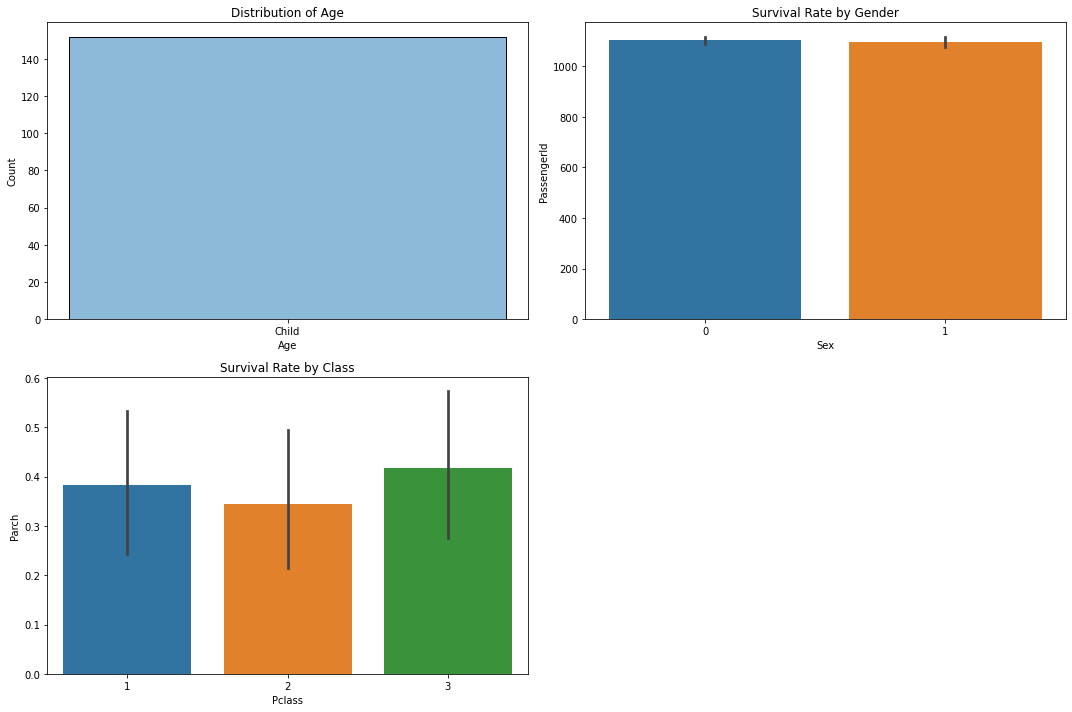

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(test_df['Age'], kde=True)
plt.title('Distribution of Age')

# Survival rate by gender
plt.subplot(2, 2, 2)
sns.barplot(x='Sex', y='PassengerId', data=test_df)
plt.title('Survival Rate by Gender')

# Survival rate by class
plt.subplot(2, 2, 3)
sns.barplot(x='Pclass', y='Parch', data=test_df)
plt.title('Survival Rate by Class')

# Show the plots
plt.tight_layout()
plt.show()


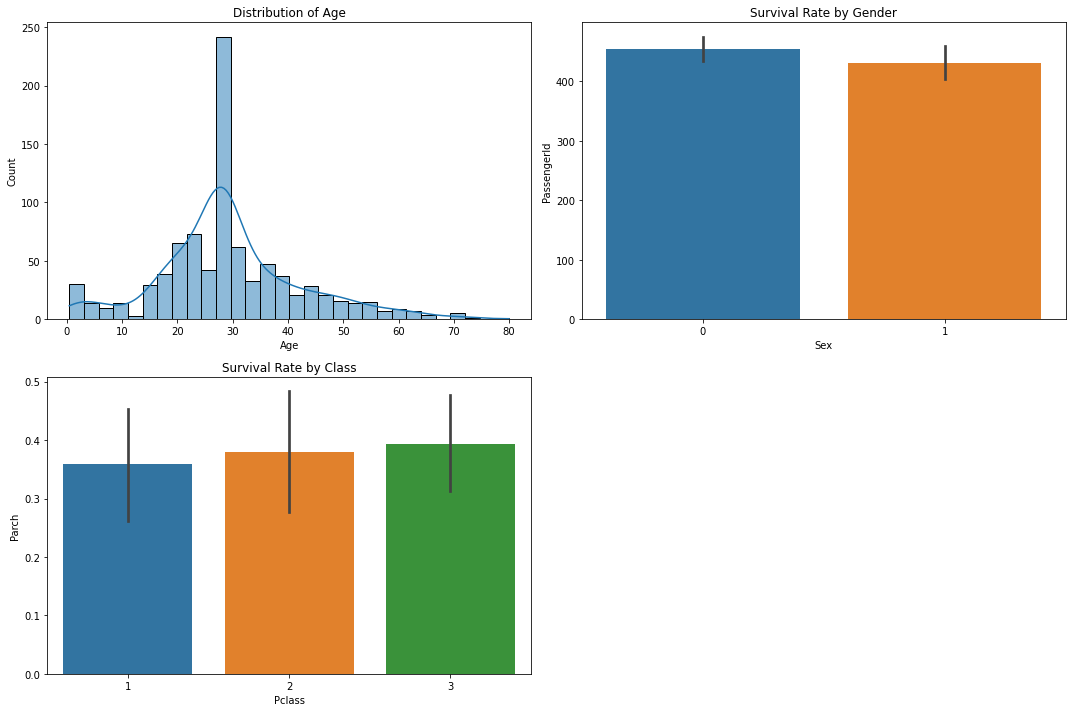

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(train_df['Age'], kde=True)
plt.title('Distribution of Age')

# Survival rate by gender
plt.subplot(2, 2, 2)
sns.barplot(x='Sex', y='PassengerId', data=train_df)
plt.title('Survival Rate by Gender')

# Survival rate by class
plt.subplot(2, 2, 3)
sns.barplot(x='Pclass', y='Parch', data=train_df)
plt.title('Survival Rate by Class')

# Show the plots
plt.tight_layout()
plt.show()

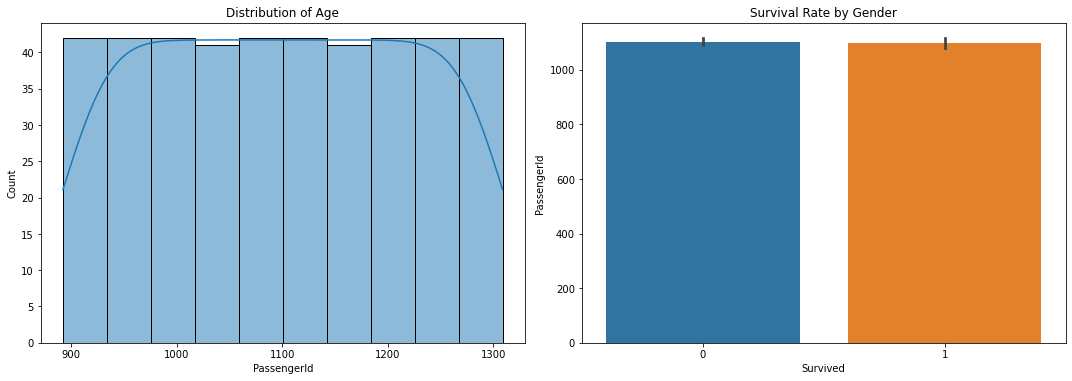

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(2, 2, 1)
sns.histplot(gender_submission_df['PassengerId'], kde=True)
plt.title('Distribution of Age')

# Survival rate by gender
plt.subplot(2, 2, 2)
sns.barplot(x='Survived', y='PassengerId', data=gender_submission_df)
plt.title('Survival Rate by Gender')

# Show the plots
plt.tight_layout()
plt.show()